<a href="https://colab.research.google.com/github/mmaciejewska10-byte/Strategia-optymalizacji-cenowej-dla-nowych-obiekt-w-Airbnb/blob/main/Projekt_ko%C5%84cowy_15_08_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd

# Ładuję zbiór jako DataFrame
df = pd.read_excel("Airbnb_Open_Data.xlsx")

# liczę wiersze i kolumny, nazwy, typy danych i brakujące wartości
print(df.shape)
print(df.columns)
print(df.info())

# 2. Pierwsze 5 wierszy
print(df.head())
print("\n")

# liczę jaki procent zbioru zajmują komórki z brakami danych

# całkowita liczba komórek
total_cells = df.size

# liczba braków
missing_cells = df.isna().sum().sum()

# procent braków względem wszystkich danych
missing_percent = (missing_cells / total_cells) * 100

print(f"Braki stanowiły {missing_percent:.2f}% wszystkich wartości")


(102599, 25)
Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'reviews per month', 'review rate number',
       'calculated host listings count', 'availability 365', 'house_rules',
       'license'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 25 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102325 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name         

In [ ]:
# Sprawdzam ile jest unikatowych wartości w poszczególnych kolumnach

print("Room type value counts:")
print(df['room type'].value_counts().to_string())
print("\n")

print("Country value counts:")
print(df['country'].value_counts().to_string())
print("\n")

print("Neighbourhood value counts:")
print(df['neighbourhood'].value_counts().to_string())
print("\n")

print("Host identity verified value counts:")
print(df['host_identity_verified'].value_counts().to_string())
print("\n")

print("Cancellation policy value counts:")
print(df['cancellation_policy'].value_counts().to_string())
print("\n")

# Sprawdzam duplikaty

print(df.duplicated().sum())

# Sprawdzam w jakim formacie zapisane jest kolumna "Price", czyszcze ją z niepotrzebnych znaków

df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)
print(df['price'].describe().to_string())

df.to_excel("poprawiona_tabela.xlsx", index=False)


Room type value counts:
room type
Entire home/apt    53701
Private room       46556
Shared room         2226
Hotel room           116


Country value counts:
country
United States    102599


Neighbourhood value counts:
neighbourhood
Bedford-Stuyvesant            7953
Williamsburg                  7775
Harlem                        5466
Bushwick                      4982
Hell's Kitchen                3965
Upper West Side               3860
Upper East Side               3680
East Village                  3492
Midtown                       3390
Crown Heights                 3262
East Harlem                   2341
Chelsea                       2285
Greenpoint                    2143
Lower East Side               1948
Astoria                       1876
Washington Heights            1779
Financial District            1490
West Village                  1484
Flatbush                      1295
East Flatbush                 1211
Prospect-Lefferts Gardens     1165
Long Island City              1

In [23]:
# wykonuje mapowanie danych dla kolumn: neighbourhood i neighbourhood group


mapping = df.dropna(subset=["neighbourhood group"]) \
.drop_duplicates(subset=["neighbourhood"]) \
.set_index("neighbourhood")["neighbourhood group"]

# Uzupełniam braki
df["neighbourhood group"] = df["neighbourhood group"].fillna(
df["neighbourhood"].map(mapping))

print(df[["neighbourhood", "neighbourhood group"]])



              neighbourhood neighbourhood group
0                Kensington            Brooklyn
1                   Midtown           Manhattan
2                    Harlem           Manhattan
3              Clinton Hill            Brooklyn
4               East Harlem           Manhattan
...                     ...                 ...
102594         Williamsburg            Brooklyn
102595  Morningside Heights           Manhattan
102596           Park Slope            Brooklyn
102597     Long Island City              Queens
102598      Upper West Side           Manhattan

[102599 rows x 2 columns]


In [24]:
# Sprawdzam brakujące dane

missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print(missing)

# Jako że sprawdziłam, że w kolumnie "country" występuje tylko USA, uzupełniam braki tym właśnie państwem

df['country'] = df['country'].fillna('United States')

# Uzupełniam pozostałe braki

df['host name'] = df['host name'].fillna('Unknow')
df['NAME'] = df['NAME'].fillna('Unknow')
df['price'] = df['price'].fillna(round(df['price'].mean(), 2))
df['reviews per month'] = df['reviews per month'].fillna(0)
df['number of reviews'] = df['number of reviews'].fillna(0)
df['instant_bookable'] = df['instant_bookable'].fillna(0)
df['review rate number'] = df['review rate number'].fillna(round(df['review rate number'].median(), 2))
df['availability 365'] = df['availability 365'].fillna(round(df['availability 365'].median(), 2))
df['minimum nights'] = df['minimum nights'].fillna(round(df['minimum nights'].median(), 2))
df['host_identity_verified'] = df['host_identity_verified'].fillna('unverified')
df['cancellation_policy'] = df['cancellation_policy'].fillna(df['cancellation_policy'].mode()[0])
df['country code'] = df['country code'].fillna('US')
df['calculated host listings count'] = df['calculated host listings count'].fillna(round(df['calculated host listings count'].mean(), 2))

df.to_excel("poprawiona_tabela.xlsx", index=False)


license                           102597
house_rules                        54843
reviews per month                  15879
country                              532
availability 365                     448
minimum nights                       409
host name                            408
review rate number                   326
calculated host listings count       319
host_identity_verified               289
NAME                                 274
service fee                          247
price                                247
Construction year                    214
number of reviews                    183
country code                         131
instant_bookable                     105
cancellation_policy                   76
neighbourhood                         16
lat                                    8
long                                   8
dtype: int64


In [26]:
# Usuwam kolumny 'Licence' 'House Rules' 'Lat' i 'Long', które posiadają dużo braków i nie są dla mnie istotne w mojej analizie

df.drop(columns=['license', 'house_rules', 'lat', 'long'], inplace=True)

df.to_excel("poprawiona_tabela.xlsx", index=False)


In [ ]:
# Chcę zbiorczo potraktować trzy kolumny: number_of_reviews, calculated_host_listings_count oraz host_identity_verified jako składowe doświadczenie właściciela. Utworzę nową koulmnę: host_experience_score i nadam punkację

def score_host_experience(row):
    score = 0

    # Punkty za liczbę recenzji
    if row['number of reviews'] > 50:
        score += 2
    elif row['number of reviews'] > 10:
        score += 1

    # Punkty za liczbę ofert
    if row['calculated host listings count'] > 3:
        score += 2
    elif row['calculated host listings count'] > 1:
        score += 1

    # Punkt za weryfikację tożsamości
    if row['host_identity_verified'] in ['t', True]:
        score += 1

    return score

df['host_experience_score'] = df.apply(score_host_experience, axis=1)

print(df[['number of reviews', 'calculated host listings count', 'host_identity_verified', 'host_experience_score']].head(10))

df.to_excel("poprawiona_tabela.xlsx", index=False)



   number of reviews  calculated host listings count host_identity_verified  \
0                9.0                             6.0            unconfirmed   
1               45.0                             2.0               verified   
2                0.0                             1.0             unverified   
3              270.0                             1.0            unconfirmed   
4                9.0                             1.0               verified   
5               74.0                             1.0               verified   
6               49.0                             1.0             unverified   
7               49.0                             1.0            unconfirmed   
8              430.0                             1.0               verified   
9              118.0                             1.0            unconfirmed   

   host_experience_score  
0                      2  
1                      2  
2                      0  
3                     

Exception ignored in: <function ZipFile.__del__ at 0x7c6c3f3567a0>
Traceback (most recent call last):
  File "/usr/lib/python3.11/zipfile.py", line 1895, in __del__
    self.close()
  File "/usr/lib/python3.11/zipfile.py", line 1912, in close
    self.fp.seek(self.start_dir)
ValueError: seek of closed file


host_experience_score
0    37963
1    24872
2    27492
3     9673
4     2599


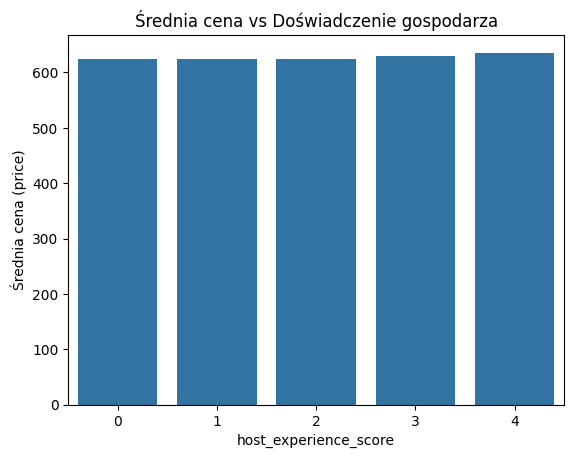

In [ ]:
# Wykres do poprzedniego scoringu

print(df['host_experience_score'].value_counts().sort_index().to_string())

import seaborn as sns
import matplotlib.pyplot as plt

# Liczę średnią cene w stosunku do doświadczenia gospodarza

avg_price_by_score = df.groupby('host_experience_score')['price'].mean().reset_index()

# Tworzę wykrers

sns.barplot(x='host_experience_score', y='price', data=avg_price_by_score)

plt.title("Średnia cena vs Doświadczenie gospodarza")
plt.xlabel("host_experience_score")
plt.ylabel("Średnia cena (price)")
plt.show()

df.to_excel("poprawiona_tabela.xlsx", index=False)



In [ ]:
# Wygląda na to, że doświadczenie hosta nie ma wpływu na cenę. Sprawdzam więc lokalizację. Skupiam się na 10 najpouplarniejszych dzielnicach, ponieważ jest ich bardzo dużo (sprawdziłam to na początku).

print(df['neighbourhood'].nunique())
print(df['neighbourhood'].value_counts().head(10).to_string())
print("\n")

# Liczę średnią cene według dzielnicy

avg_price_by_neighbourhood = df.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)
print(avg_price_by_neighbourhood.head(10).to_string())

df.to_excel("poprawiona_tabela.xlsx", index=False)



224
neighbourhood
Bedford-Stuyvesant    7953
Williamsburg          7775
Harlem                5466
Bushwick              4982
Hell's Kitchen        3965
Upper West Side       3860
Upper East Side       3680
East Village          3492
Midtown               3390
Crown Heights         3262


neighbourhood
New Dorp                  1045.000000
Chelsea, Staten Island    1042.000000
Fort Wadsworth            1024.000000
Little Neck                817.750000
Jamaica Hills              812.904762
Arden Heights              804.888889
Midland Beach              796.176471
Shore Acres                792.260870
Mill Basin                 775.142857
Riverdale                  768.736842


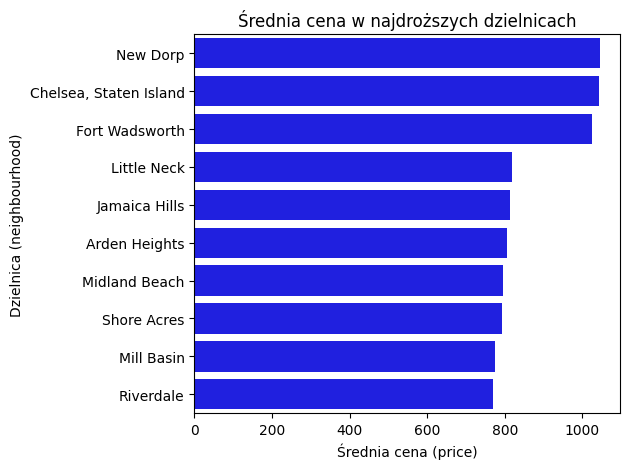

Plik został zapisany jako: Airbnb_Open_Data_NEW.csv


In [ ]:
# Tworzę wykresy na podstawie tych danych

top10 = avg_price_by_neighbourhood.head(10).reset_index()

# Wykres
sns.barplot(x='price', y='neighbourhood', data=top10, color='blue')

plt.title("Średnia cena w najdroższych dzielnicach")
plt.xlabel("Średnia cena (price)")
plt.ylabel("Dzielnica (neighbourhood)")
plt.tight_layout()
plt.show()



price                             1.000000
service fee                       1.000000
id                                0.006730
number of reviews                 0.005319
reviews per month                 0.005256
host_experience_score             0.004694
review rate number                0.004509
host id                           0.003832
Construction year                 0.003749
minimum nights                    0.003431
availability 365                  0.002790
instant_bookable                  0.000312
calculated host listings count    0.000105
Name: price, dtype: float64




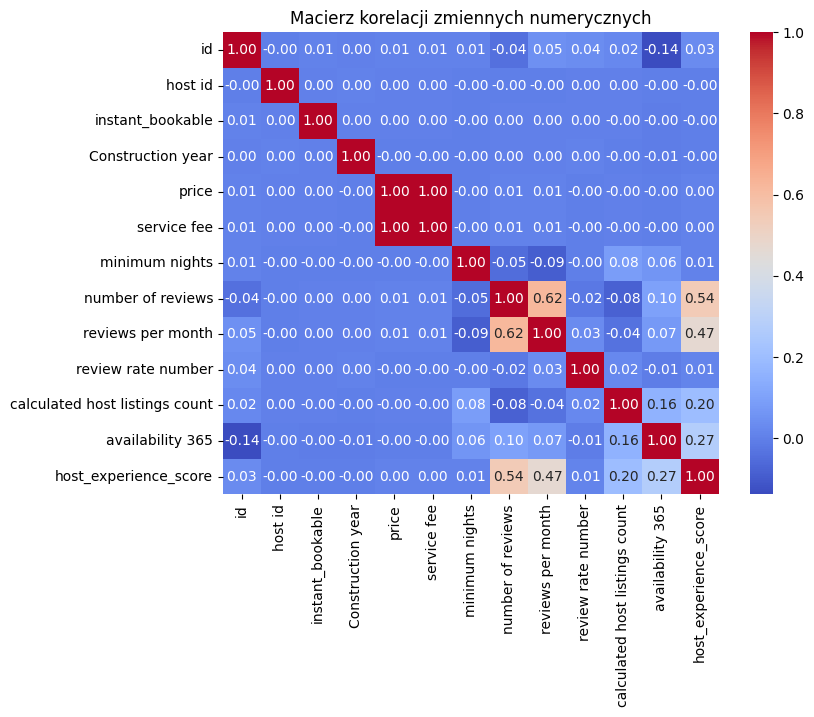

Plik został zapisany jako: Airbnb_Open_Data_NEW.csv


In [ ]:
# Sprawdzam, które kolumny jeszcze mają korelację z ceną

numeric_df = df.select_dtypes(include=['number'])

corr_matrix = numeric_df.corr()
price_corr = corr_matrix['price'].abs().sort_values(ascending=False)
print(price_corr)
print("\n")

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Macierz korelacji zmiennych numerycznych')
plt.show()



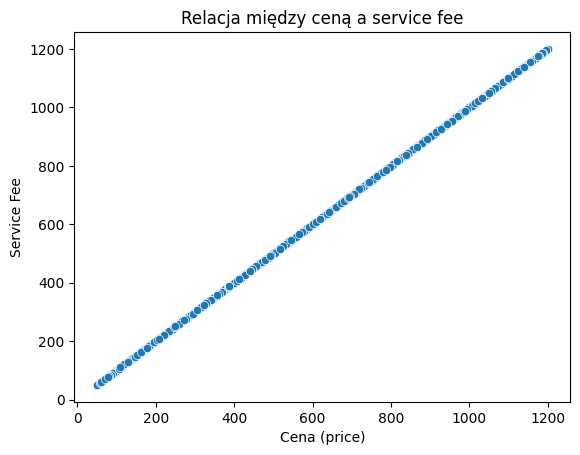

     price  service fee
0    966.0        966.0
1    142.0        142.0
2    620.0        620.0
3    368.0        368.0
4    204.0        204.0
5    577.0        577.0
6     71.0         71.0
7   1060.0       1060.0
8   1018.0       1018.0
9    291.0        291.0
10   319.0        319.0
11   606.0        606.0
12   714.0        714.0
13   580.0        580.0
14   149.0        149.0
15   578.0        578.0
16   778.0        778.0
17   656.0        656.0
18   460.0        460.0
19  1095.0       1095.0
20   281.0        281.0
21   477.0        477.0
22   133.0        133.0
23  1050.0       1050.0
24   816.0        816.0
25  1175.0       1175.0
26   530.0        530.0
27   274.0        274.0
28   209.0        209.0
29   432.0        432.0
Plik został zapisany jako: Airbnb_Open_Data_NEW.csv


In [ ]:
# Sprawdzam jeszcze raz korelację ceny a opłaty serwisowej

sns.scatterplot(x='price', y='service fee', data=df)
plt.title("Relacja między ceną a service fee")
plt.xlabel("Cena (price)")
plt.ylabel("Service Fee")
plt.show()

# Korelacja między ceną a opłatą serwisową okazała się nieistotna. Pomijam ją więc.

print(df[['price', 'service fee']].head(30))



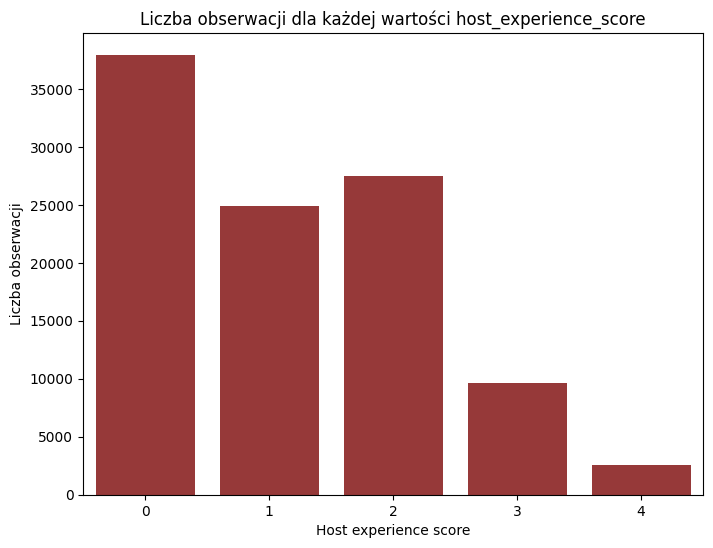

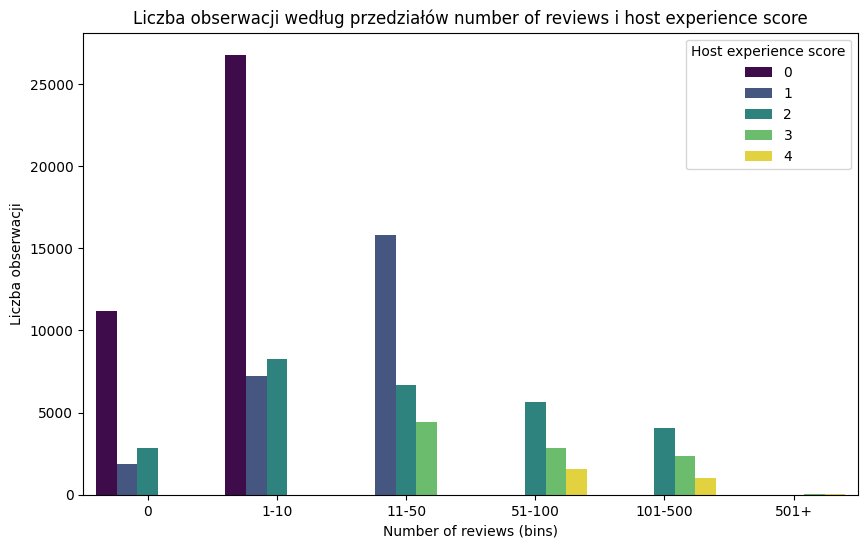

Plik został zapisany jako: Airbnb_Open_Data_NEW.csv


In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='host_experience_score', data=df, color='brown')
plt.title('Liczba obserwacji dla każdej wartości host_experience_score')
plt.xlabel('Host experience score')
plt.ylabel('Liczba obserwacji')
plt.show()
print("\n")

df['reviews_bin'] = pd.cut(df['number of reviews'], bins=[-1, 0, 10, 50, 100, 500, 1000], labels=['0', '1-10', '11-50', '51-100', '101-500', '501+'])

plt.figure(figsize=(10,6))
sns.countplot(x='reviews_bin', hue='host_experience_score', data=df, palette='viridis')
plt.title('Liczba obserwacji według przedziałów number of reviews i host experience score')
plt.xlabel('Number of reviews (bins)')
plt.ylabel('Liczba obserwacji')
plt.legend(title='Host experience score')
plt.show()




   availability 365  availability_category
0             286.0                      2
1             228.0                      2
2             352.0                      3
3             322.0                      2
4             289.0                      2




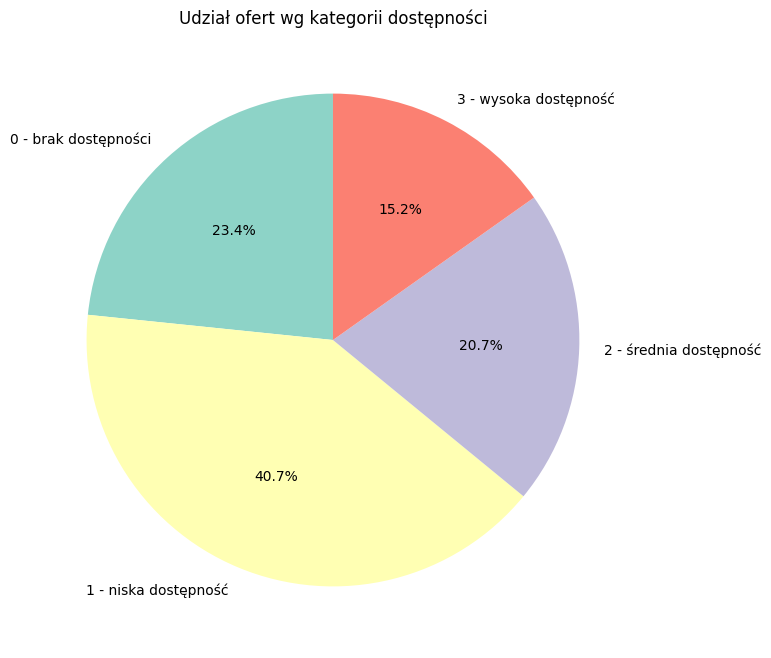

In [ ]:
# Tworzę nową kategoryzację na podstawie dostępności 365 dni w roku i dzielę na wysoką dostępność, średnią, niską i brak dostępności


def availability_category(availability_days):
    ratio = availability_days / 365
    if ratio >= 0.9:
        return 3
    elif ratio >= 0.5:
        return 2
    elif ratio > 0:
        return 1
    else:
        return 0

df['availability_category'] = df['availability 365'].apply(availability_category)

print(df[['availability 365', 'availability_category']].head())
print("\n")

# Tworzę wykres na podstawie nowej kategoryzacj

category_counts = df['availability_category'].value_counts().sort_index()


labels = ['0 - brak dostępności',
          '1 - niska dostępność',
          '2 - średnia dostępność',
          '3 - wysoka dostępność']


sizes = [category_counts.get(i, 0) for i in range(4)]

# Tworzę wykres kołowy
plt.figure(figsize=(8, 8))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Set3.colors)
plt.title('Udział ofert wg kategorii dostępności')
plt.show()

df.to_excel("poprawiona_tabela.xlsx", index=False)



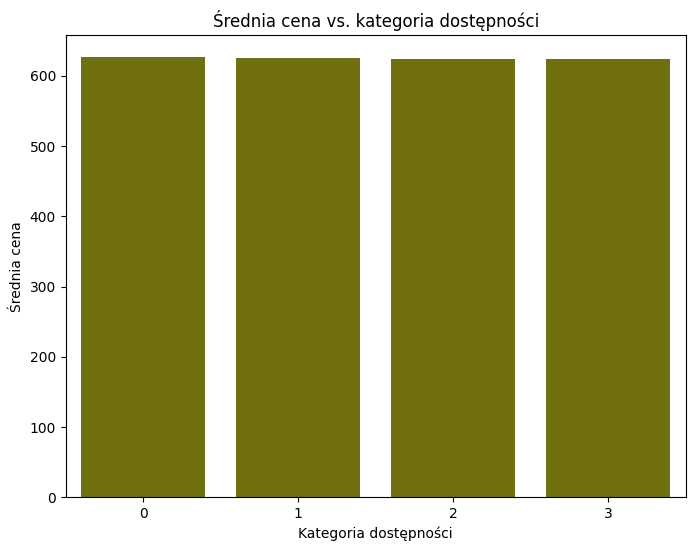

In [ ]:
# Sprawdzam jaka jest średnia cena w zależności od dostępności

avg_price_by_category = df.groupby('availability_category')['price'].mean().reset_index()

# wykres słupkowy
plt.figure(figsize=(8,6))
sns.barplot(x='availability_category', y='price', data=avg_price_by_category, color='olive')
plt.title('Średnia cena vs. kategoria dostępności')
plt.xlabel('Kategoria dostępności')
plt.ylabel('Średnia cena')
plt.show()

# Dostępność nie ma wpływu na cenę

df.to_excel("poprawiona_tabela.xlsx", index=False)

count    102599.000000
mean        625.293528
std         331.272131
min          50.000000
25%         341.000000
50%         625.290000
75%         912.000000
max        1200.000000
Name: price, dtype: float64




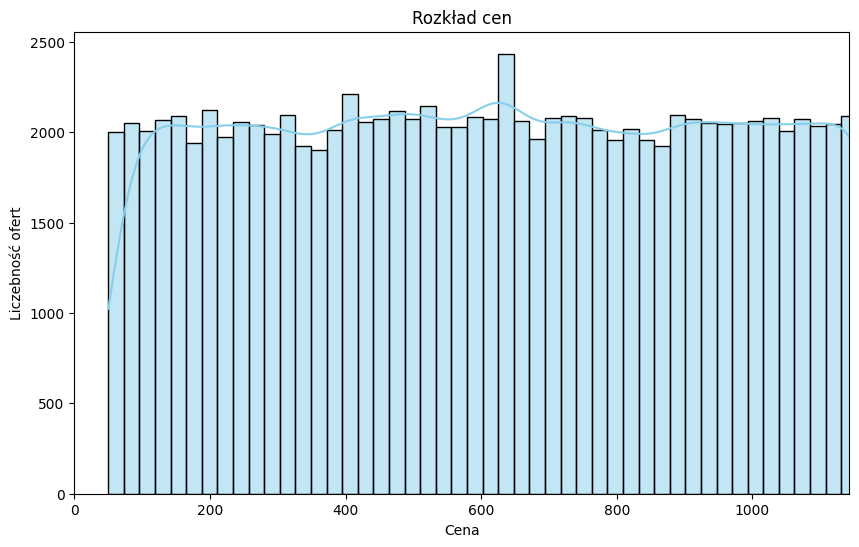

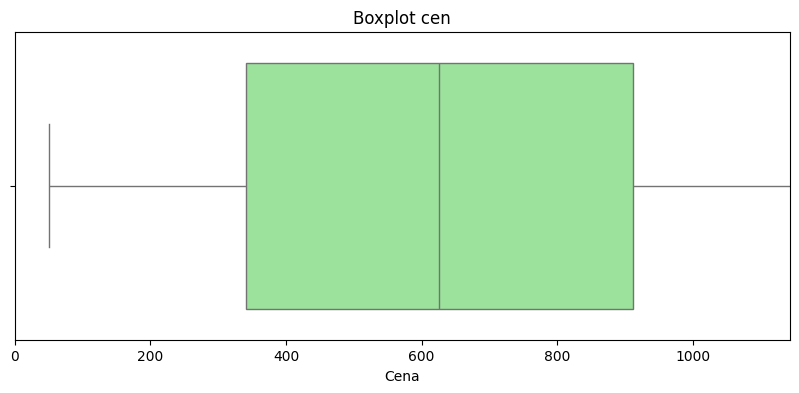

Plik został zapisany jako: Airbnb_Open_Data_NEW.csv


In [ ]:
# Tworzę histogram i boxplot na podstawie statystyk opisowych zmiennej "cena"


print(df['price'].describe())
print("\n")


plt.figure(figsize=(10,6))
sns.histplot(df['price'], bins=50, kde=True, color='skyblue')
plt.title("Rozkład cen")
plt.xlabel("Cena")
plt.ylabel("Liczebność ofert")
plt.xlim(0, df['price'].quantile(0.95))
plt.show()
print("\n")


plt.figure(figsize=(10,4))
sns.boxplot(x=df['price'], color='lightgreen')
plt.title("Boxplot cen")
plt.xlabel("Cena")
plt.xlim(0, df['price'].quantile(0.95))
plt.show()



In [ ]:
df.to_excel("poprawiona_tabela.xlsx", index=False)

from google.colab import files
files.download("poprawiona_tabela.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>